In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam, RMSprop, SGD
from keras.initializers import glorot_uniform, he_normal
from keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/Stock Algorithim/runAlgo")

In [49]:
# Download historical stock data
ticker_symbol = "SPY"
start_date = "2010-01-01"
end_date = "2022-01-01"
data = yf.download(ticker_symbol, start=start_date, end=end_date, interval='5d')

# Extract the closing prices
df = data[['Close']].copy()

[*********************100%%**********************]  1 of 1 completed


In [50]:
df.head()

,Close
Date,
2010-01-06,113.709999
2010-01-11,114.730003
2010-01-21,111.699997
2010-01-26,109.309998
2010-02-05,106.660004


In [51]:
# Normalize the data
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Create sequences of historical data for training (lookback of 5 days)
sequence_length = 5  # Number of previous days to use for prediction
X, y = [], []

for i in range(len(df) - sequence_length):
    X.append(df['Close'].iloc[i : i + sequence_length].values)
    y.append(df['Close'].iloc[i + sequence_length])

X = np.array(X)
y = np.array(y)

In [52]:
# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [53]:
# Build the LSTM model
model = keras.Sequential()
model.add(layers.LSTM(50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [54]:
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=1)

Epoch 1/30
476/476 [==============================] - 4s 3ms/step - loss: 0.0035
Epoch 2/30
476/476 [==============================] - 2s 3ms/step - loss: 3.1852e-04
Epoch 3/30
476/476 [==============================] - 2s 3ms/step - loss: 2.9721e-04
Epoch 4/30
476/476 [==============================] - 2s 3ms/step - loss: 2.8640e-04
Epoch 5/30
476/476 [==============================] - 2s 3ms/step - loss: 2.8285e-04
Epoch 6/30
476/476 [==============================] - 2s 4ms/step - loss: 2.9614e-04
Epoch 7/30
476/476 [==============================] - 2s 5ms/step - loss: 2.9290e-04
Epoch 8/30
476/476 [==============================] - 2s 5ms/step - loss: 2.6560e-04
Epoch 9/30
476/476 [==============================] - 2s 4ms/step - loss: 2.4554e-04
Epoch 10/30
476/476 [==============================] - 2s 3ms/step - loss: 2.4009e-04
Epoch 11/30
476/476 [==============================] - 2s 3ms/step - loss: 2.4623e-04
Epoch 12/30
476/476 [==============================] - 2s 3ms/step 

In [62]:
model.save('Models/lstm(11-20)[5DayPeriod-Test1].keras')

In [ ]:
from keras.models import load_model
model = load_model('Models/lstm(11-3).keras')

In [55]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

4/4 [==============================] - 0s 5ms/step - loss: 7.2067e-04
Test Loss: 0.000720671028830111


In [56]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse scaling to get real prices
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

4/4 [==============================] - 1s 4ms/step


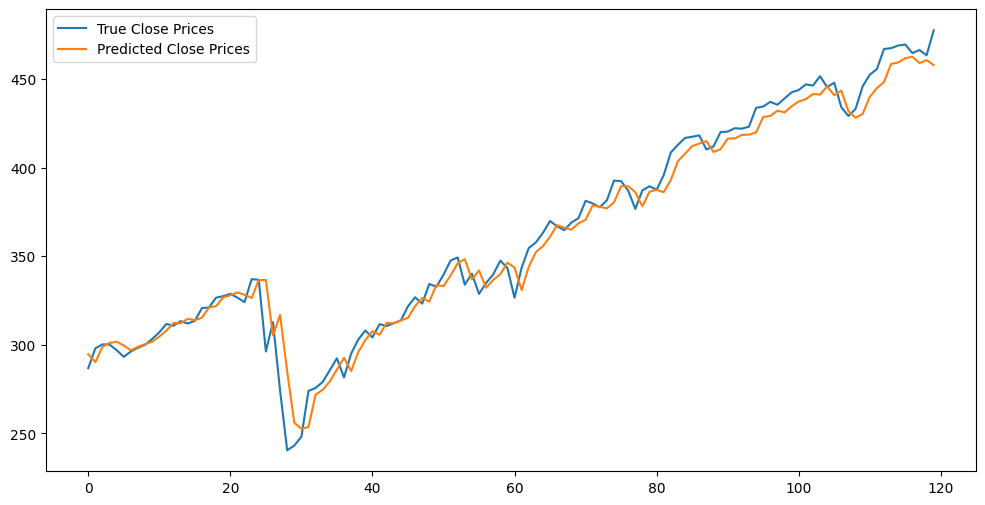

In [57]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="True Close Prices")
plt.plot(y_pred, label="Predicted Close Prices")
plt.legend()
plt.show()


In [14]:
!cp Methods/atulysismethods.py /content
import atulysismethods as am

In [58]:
_,CompHoldouts = am.compReturnsByHoldout(y_pred,y_test,30)

In [59]:
AccHoldout = am.accuracyByHoldout(30,y_pred,y_test)

In [60]:
AccHoldout.head(4)

,Holdout,Accuracy
14,15,1.0
13,14,1.0
27,28,1.0
25,26,1.0


In [61]:
CompHoldouts

,Holdout,Comp Returns
2,3,3.383882
1,2,3.304313
5,6,2.970900
6,7,2.820643
9,10,2.601103
13,14,2.595459
3,4,2.437485
14,15,2.383321
7,8,2.348762
4,5,2.280767
